<a href="https://colab.research.google.com/github/juliussmith2027-source/Analytics-Projects/blob/main/Business_Analytics_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1

part 1.1 Download libraries and dataset of housing information

In [ ]:
import pandas as pd #for data analysis#
import numpy as np #for data analysis#
import matplotlib.pyplot as plt #for visualization#
import seaborn as sns #for better looking visualization
import scipy.stats as stats  # Statistical analysis
import statsmodels.api as sm  # Regression analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm
from sklearn.impute import SimpleImputer  # For handling missing data

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


import os


# List files and directories in the specified path
os.listdir('/content/drive/My Drive/BUS310/Data_BUS310')


# Correct path to your CSV file
file_path = '/content/drive/My Drive/BUS310/Data_BUS310/housing_price_full_sample.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
df.head()


Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


View which Columns have missing information and clean data

In [ ]:
# Check which columns have missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print(missing_values)

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Impute numerical variables with the mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [ ]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute categorical variables with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Check if missing values are gone
print(df.isnull().sum().sum())  # Should print 0

0


Part 1.2

In [ ]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Display first few rows after encoding
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False


Part 1.3

Years and months are categorical because they represent time periods rather than numerical measures.

In [ ]:
print(df['YrSold'].unique())  # Show unique years
print(f"Number of years in dataset: {df['YrSold'].nunique()}")

[2008. 2007. 2006. 2009. 2010.]
Number of years in dataset: 5


In [ ]:
# Convert to categorical variables
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)
df['MSSubClass'] = df['MSSubClass'].astype(str)

# Create dummy variables for these categorical columns
df = pd.get_dummies(df, columns=['YrSold', 'MoSold', 'YearBuilt', 'MSSubClass'], drop_first=True)

# Display updated dataframe
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0
0,1.0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,...,False,False,False,False,True,False,False,False,False,False
1,2.0,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,68.0,11250.0,7.0,5.0,2002.0,162.0,486.0,0.0,434.0,...,False,False,False,False,True,False,False,False,False,False
3,4.0,60.0,9550.0,7.0,5.0,1970.0,0.0,216.0,0.0,540.0,...,False,False,False,False,False,True,False,False,False,False
4,5.0,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,...,False,False,False,False,True,False,False,False,False,False


#Part 2

Part 2.1 Summary Statistics for the sale price of houses in dataset

In [ ]:
# Check data types
print(df.dtypes)

# Summary statistics of dataset
#df.describe(include='all')

Id                 float64
LotFrontage        float64
LotArea            float64
OverallQual        float64
OverallCond        float64
                    ...   
MSSubClass_70.0       bool
MSSubClass_75.0       bool
MSSubClass_80.0       bool
MSSubClass_85.0       bool
MSSubClass_90.0       bool
Length: 389, dtype: object


Part 2.2

In [ ]:
# Basic statistics for SalePrice
saleprice_stats = df['SalePrice'].describe().round(2)
print(saleprice_stats)

count      2919.00
mean     180052.86
std       57381.56
min       34900.00
25%      154795.00
50%      176735.00
75%      191896.00
max      755000.00
Name: SalePrice, dtype: float64


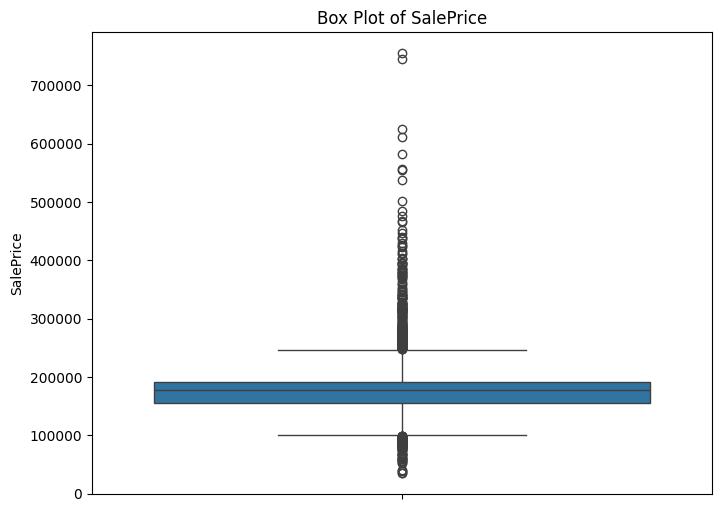

In [ ]:
# Box plot for SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

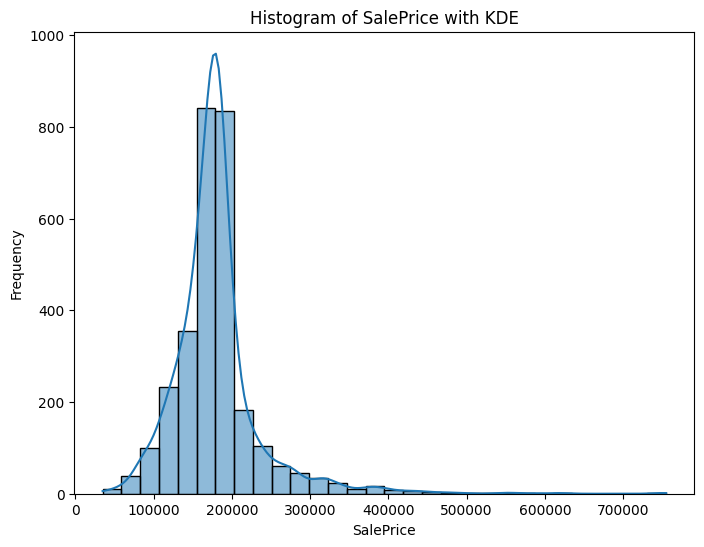

In [ ]:
# Histogram with KDE for SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Histogram of SalePrice with KDE')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count numerical variables
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Number of numerical variables: {len(num_cols)}")
print(num_cols)

Number of numerical variables: 34
Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')


In [ ]:
# Correlation matrix with SalePrice
correlations = df.corr()['SalePrice'].sort_values(ascending=False)
print(correlations)

SalePrice            1.000000
GrLivArea            0.588010
OverallQual          0.550911
TotRmsAbvGrd         0.469800
GarageCars           0.469249
                       ...   
GarageType_Detchd   -0.264334
BsmtQual_TA         -0.339221
KitchenQual_TA      -0.362053
GarageFinish_Unf    -0.364058
ExterQual_TA        -0.403625
Name: SalePrice, Length: 389, dtype: float64


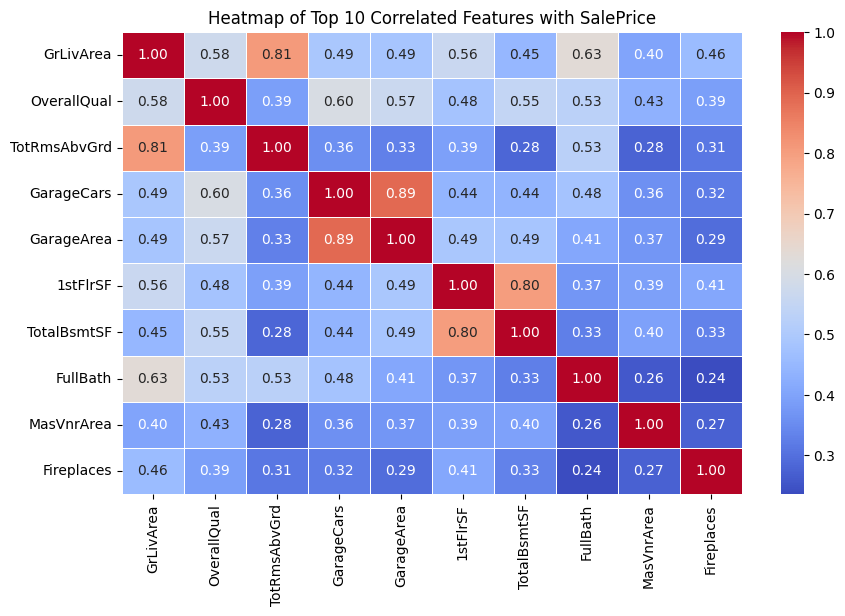

In [ ]:
# Select top 10 numerical variables correlated with SalePrice
top_corr_features = correlations.index[1:11]  # Exclude SalePrice itself

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Top 10 Correlated Features with SalePrice')
plt.show()

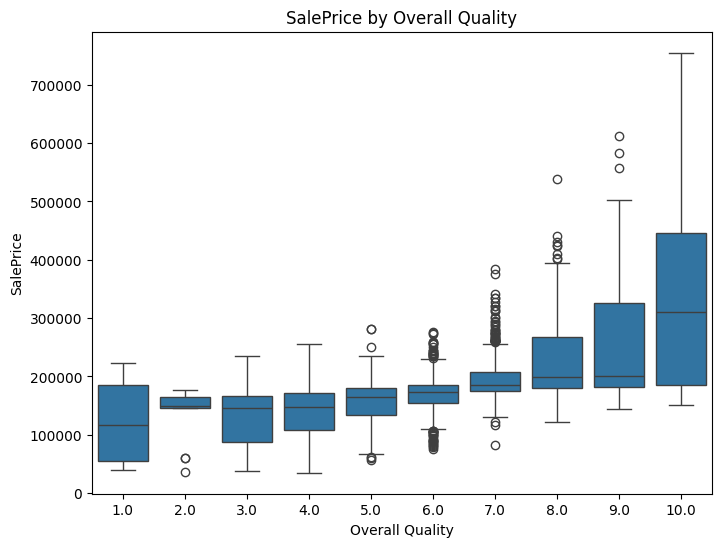

In [ ]:
# Box plot for Overall Quality vs SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

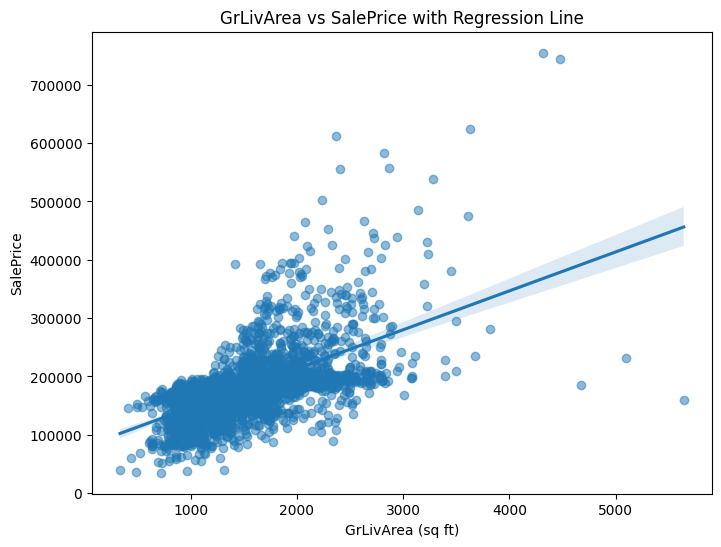

In [ ]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.regplot(x=df['GrLivArea'], y=df['SalePrice'], scatter_kws={'alpha':0.5})
plt.title('GrLivArea vs SalePrice with Regression Line')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
print(list(df.columns))

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood

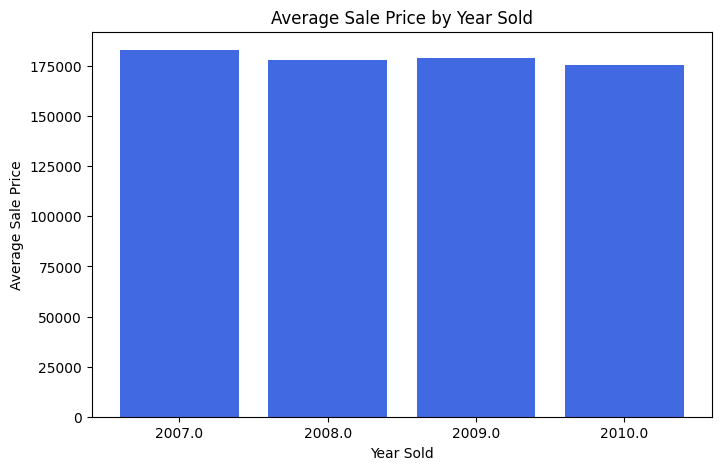

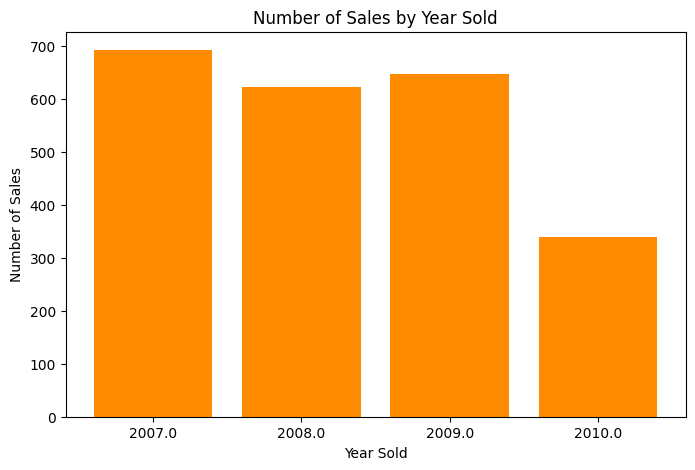

In [ ]:
# 1. Year Sold
# Extract columns related to Year Sold
year_sold_cols = [col for col in df.columns if 'YrSold' in col]

# Compute the average SalePrice per year sold
year_sold_avg = {col.split('_')[-1]: df.loc[df[col] == 1, 'SalePrice'].mean() for col in year_sold_cols}

# Convert to DataFrame for plotting
year_sold_df = pd.DataFrame(year_sold_avg.items(), columns=['YearSold', 'AvgSalePrice'])

# Sort by year
year_sold_df = year_sold_df.sort_values(by='YearSold')

# Plot bar chart for average SalePrice by year sold
plt.figure(figsize=(8, 5))
plt.bar(year_sold_df['YearSold'], year_sold_df['AvgSalePrice'], color='royalblue')
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Year Sold")
plt.show()

# Compute the number of sales for each year
year_sold_count = {col.split('_')[-1]: df[col].sum() for col in year_sold_cols}

# Convert to DataFrame for plotting
year_sold_count_df = pd.DataFrame(year_sold_count.items(), columns=['YearSold', 'NumberOfSales'])

# Sort by year
year_sold_count_df = year_sold_count_df.sort_values(by='YearSold')

# Plot bar chart for number of sales by year sold
plt.figure(figsize=(8, 5))
plt.bar(year_sold_count_df['YearSold'], year_sold_count_df['NumberOfSales'], color='darkorange')
plt.xlabel("Year Sold")
plt.ylabel("Number of Sales")
plt.title("Number of Sales by Year Sold")
plt.show()

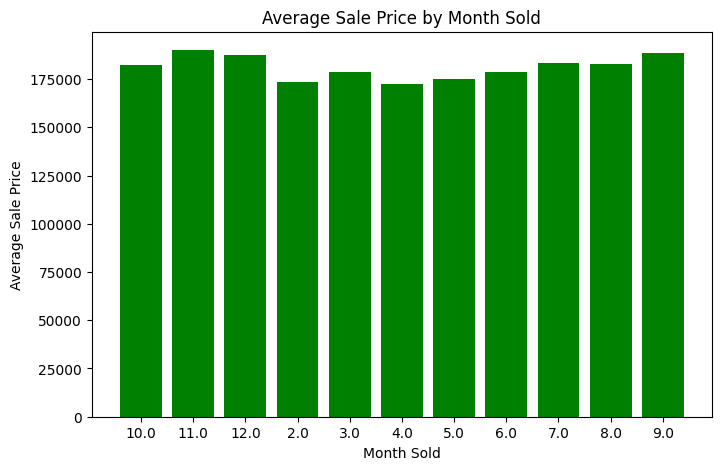

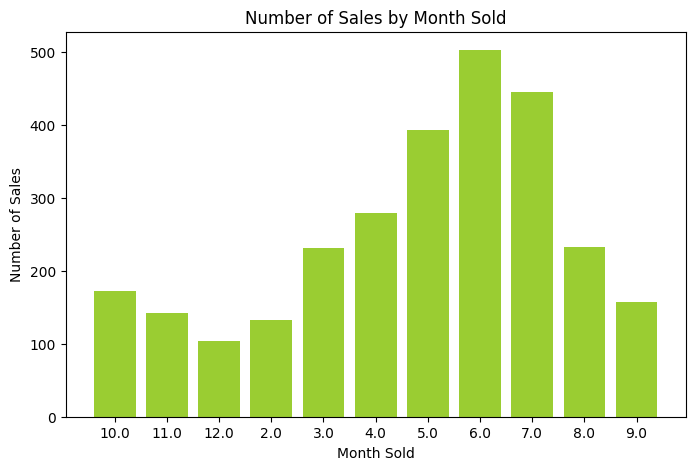

In [ ]:
# 2. Month Sold
# Extract columns related to Month Sold
month_sold_cols = [col for col in df.columns if 'MoSold' in col]

# Compute the average SalePrice per month sold
month_sold_avg = {col.split('_')[-1]: df.loc[df[col] == 1, 'SalePrice'].mean() for col in month_sold_cols}

# Convert to DataFrame for plotting
month_sold_df = pd.DataFrame(month_sold_avg.items(), columns=['MonthSold', 'AvgSalePrice'])

# Sort by month
month_sold_df = month_sold_df.sort_values(by='MonthSold')

# Plot bar chart for average SalePrice by month sold
plt.figure(figsize=(8, 5))
plt.bar(month_sold_df['MonthSold'], month_sold_df['AvgSalePrice'], color='green')
plt.xlabel("Month Sold")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Month Sold")
plt.show()

# Compute the number of sales for each month
month_sold_count = {col.split('_')[-1]: df[col].sum() for col in month_sold_cols}

# Convert to DataFrame for plotting
month_sold_count_df = pd.DataFrame(month_sold_count.items(), columns=['MonthSold', 'NumberOfSales'])

# Sort by month
month_sold_count_df = month_sold_count_df.sort_values(by='MonthSold')

# Plot bar chart for number of sales by month sold
plt.figure(figsize=(8, 5))
plt.bar(month_sold_count_df['MonthSold'], month_sold_count_df['NumberOfSales'], color='yellowgreen')
plt.xlabel("Month Sold")
plt.ylabel("Number of Sales")
plt.title("Number of Sales by Month Sold")
plt.show()

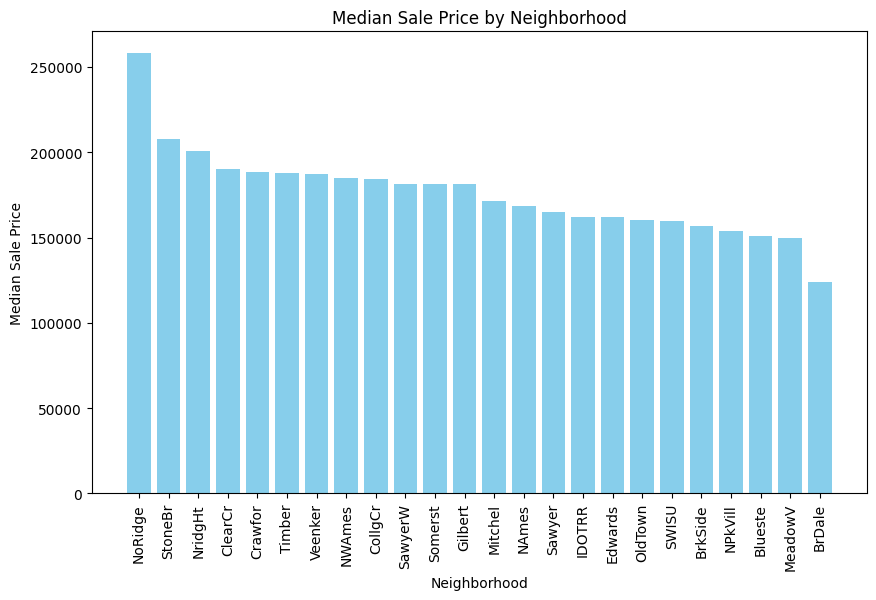

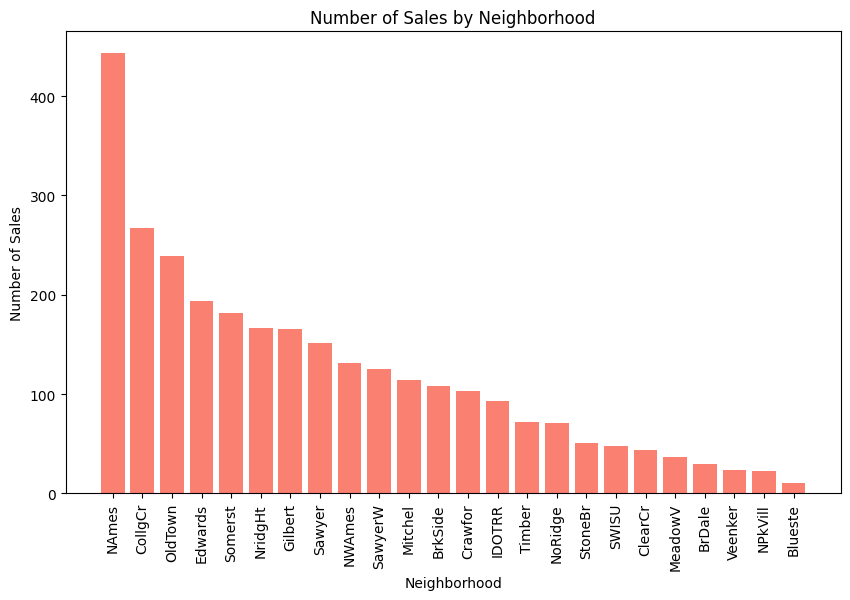

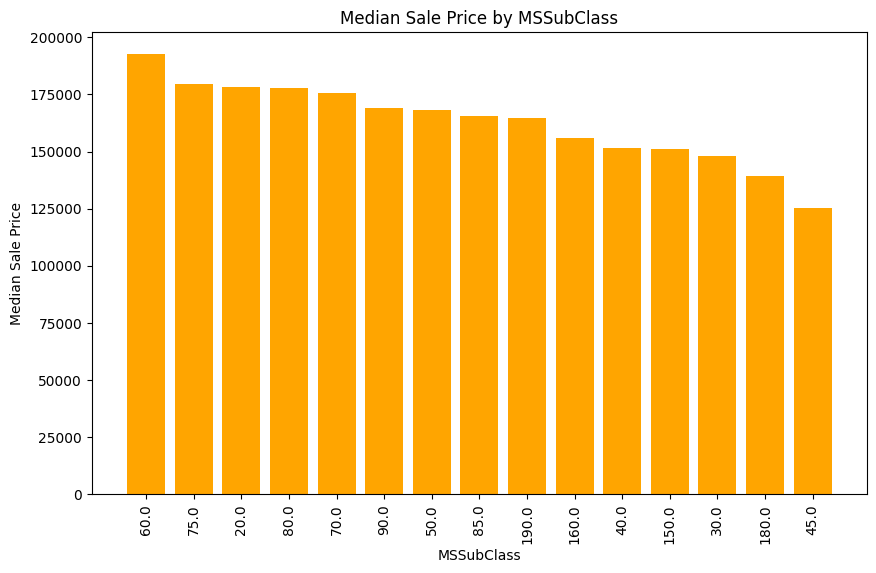

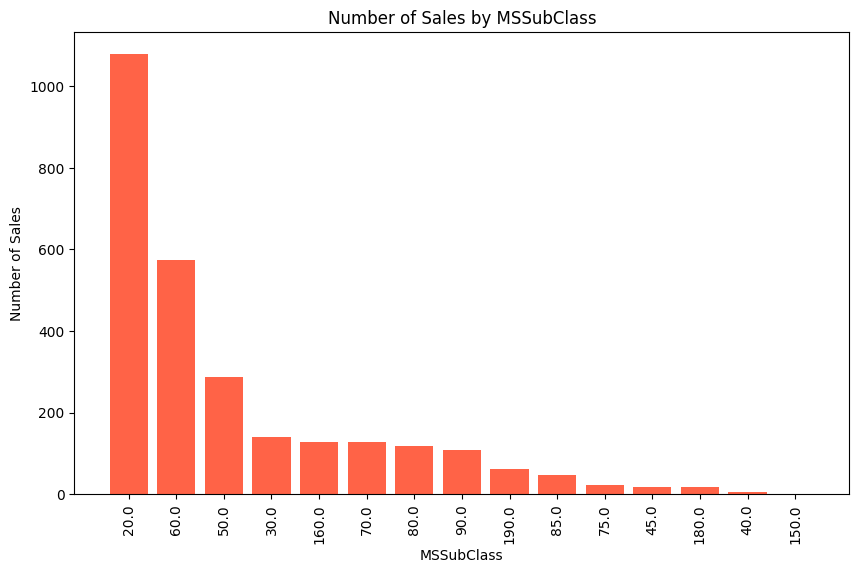

In [ ]:
# 3. Neighborhood and MSSubClass
# Plot bar chart for median SalePrice by Neighborhood
neighborhood_cols = [col for col in df.columns if 'Neighborhood' in col]
neighborhood_median = {col.split('_')[-1]: df.loc[df[col] == 1, 'SalePrice'].median() for col in neighborhood_cols}

# Convert to DataFrame for plotting
neighborhood_df = pd.DataFrame(neighborhood_median.items(), columns=['Neighborhood', 'MedianSalePrice'])

# Sort by median SalePrice
neighborhood_df = neighborhood_df.sort_values(by='MedianSalePrice', ascending=False)

# Plot bar chart for median SalePrice by Neighborhood
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_df['Neighborhood'], neighborhood_df['MedianSalePrice'], color='skyblue')
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.title("Median Sale Price by Neighborhood")
plt.xticks(rotation=90)
plt.show()

# Plot bar chart for number of sales by Neighborhood
neighborhood_sales_count = {col.split('_')[-1]: df[col].sum() for col in neighborhood_cols}

# Convert to DataFrame for plotting
neighborhood_sales_df = pd.DataFrame(neighborhood_sales_count.items(), columns=['Neighborhood', 'NumberOfSales'])

# Sort by number of sales
neighborhood_sales_df = neighborhood_sales_df.sort_values(by='NumberOfSales', ascending=False)

# Plot bar chart for number of sales by Neighborhood
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_sales_df['Neighborhood'], neighborhood_sales_df['NumberOfSales'], color='salmon')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Sales")
plt.title("Number of Sales by Neighborhood")
plt.xticks(rotation=90)
plt.show()

# Plot bar chart for median SalePrice by MSSubClass
ms_subclass_cols = [col for col in df.columns if 'MSSubClass' in col]
ms_subclass_median = {col.split('_')[-1]: df.loc[df[col] == 1, 'SalePrice'].median() for col in ms_subclass_cols}

# Convert to DataFrame for plotting
ms_subclass_df = pd.DataFrame(ms_subclass_median.items(), columns=['MSSubClass', 'MedianSalePrice'])

# Sort by median SalePrice
ms_subclass_df = ms_subclass_df.sort_values(by='MedianSalePrice', ascending=False)

# Plot bar chart for median SalePrice by MSSubClass
plt.figure(figsize=(10, 6))
plt.bar(ms_subclass_df['MSSubClass'], ms_subclass_df['MedianSalePrice'], color='orange')
plt.xlabel("MSSubClass")
plt.ylabel("Median Sale Price")
plt.title("Median Sale Price by MSSubClass")
plt.xticks(rotation=90)
plt.show()

# Plot bar chart for number of sales by MSSubClass
ms_subclass_sales_count = {col.split('_')[-1]: df[col].sum() for col in ms_subclass_cols}

# Convert to DataFrame for plotting
ms_subclass_sales_df = pd.DataFrame(ms_subclass_sales_count.items(), columns=['MSSubClass', 'NumberOfSales'])

# Sort by number of sales
ms_subclass_sales_df = ms_subclass_sales_df.sort_values(by='NumberOfSales', ascending=False)

# Plot bar chart for number of sales by MSSubClass
plt.figure(figsize=(10, 6))
plt.bar(ms_subclass_sales_df['MSSubClass'], ms_subclass_sales_df['NumberOfSales'], color='tomato')
plt.xlabel("MSSubClass")
plt.ylabel("Number of Sales")
plt.title("Number of Sales by MSSubClass")
plt.xticks(rotation=90)
plt.show()

#Part 3

3.1 Regression

Model with Top 10 Correlated Predictors:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     229.3
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:19:34   Log-Likelihood:                -35278.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2908   BIC:                         7.064e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

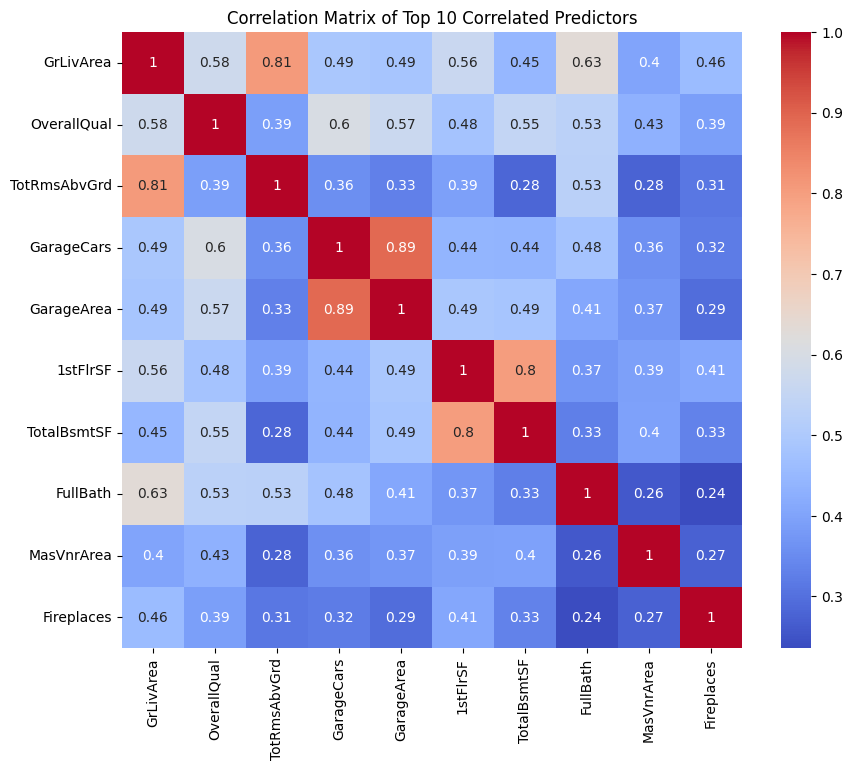


Model 1 (after dropping insignificant predictors):
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     326.9
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:19:35   Log-Likelihood:                -35280.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2911   BIC:                         7.062e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# 1. Run the regression of SalePrice on the top 10 most correlated predictors
# Assuming `top_10_correlated_predictors` is a list of the top 10 most correlated predictors
# If not already defined, create it like this:
correlation_matrix = df.corr()
top_10_correlated_predictors = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11).index[1:]

# Extract predictors (X) and target variable (Y)
X_top_10 = df[top_10_correlated_predictors]
X_top_10 = sm.add_constant(X_top_10)  # Add intercept
Y = df['SalePrice']

# Fit the model with top 10 predictors
model_top_10 = sm.OLS(Y, X_top_10).fit()

# Print the summary of the regression
print("Model with Top 10 Correlated Predictors:")
print(model_top_10.summary())

# 2. Check correlation between predictors to see which predictors are highly correlated
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_10_correlated_predictors].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Top 10 Correlated Predictors")
plt.show()

# 3. Drop predictors with high correlation or statistical insignificance
# Check for predictors with high p-value (> 0.05) and consider dropping them
significant_predictors = model_top_10.pvalues[model_top_10.pvalues <= 0.05].index
# Exclude the 'const' column from significant predictors
significant_predictors = [col for col in significant_predictors if col != 'const']

# Now, select the significant predictors for re-running the regression
X_significant = df[significant_predictors]
X_significant = sm.add_constant(X_significant)  # Add intercept

# Re-run the regression with significant predictors (Model 1)
model_1 = sm.OLS(Y, X_significant).fit()
print("\nModel 1 (after dropping insignificant predictors):")
print(model_1.summary())

# 4. Run the regression with all predictors in the dataset (Model 2)
# Drop the target variable and non-predictor columns (e.g., 'Id')
X_all_predictors = df.drop(columns=['SalePrice', 'Id'])

# Convert all categorical variables into dummy variables
X_all_predictors = pd.get_dummies(X_all_predictors, drop_first=True)

# Ensure that all columns are numeric
X_all_predictors = X_all_predictors.select_dtypes(include=[np.number])

# Add intercept
X_all_predictors = sm.add_constant(X_all_predictors)  # Add intercept

# Fit the model with all predictors
model_all = sm.OLS(Y, X_all_predictors).fit()

# Print summary of the regression
print("\nModel with All Predictors (Model 2):")
print(model_all.summary())

# 5. Drop statistically insignificant predictors (p-value > 0.05) from Model 2
# Check for predictors with high p-value (> 0.05) and drop them
insignificant_predictors = model_all.pvalues[model_all.pvalues > 0.05].index
insignificant_predictors = [col for col in insignificant_predictors if col != 'const']  # Exclude 'const'

# Create a new dataset excluding insignificant predictors
X_reduced = df.drop(columns=insignificant_predictors)
X_reduced = pd.get_dummies(X_reduced, drop_first=True)  # Convert categorical to dummy variables
X_reduced = X_reduced.select_dtypes(include=[np.number])  # Ensure only numeric columns are used
X_reduced = sm.add_constant(X_reduced)  # Add intercept

# Re-run the regression with the remaining predictors (Model 3)
model_2 = sm.OLS(Y, X_reduced).fit()
print("\nModel 2 (after dropping insignificant predictors):")
print(model_2.summary())

3.2

Model 1 (Top 10 Predictors):
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     229.3
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:19:35   Log-Likelihood:                -35278.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2908   BIC:                         7.064e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.006

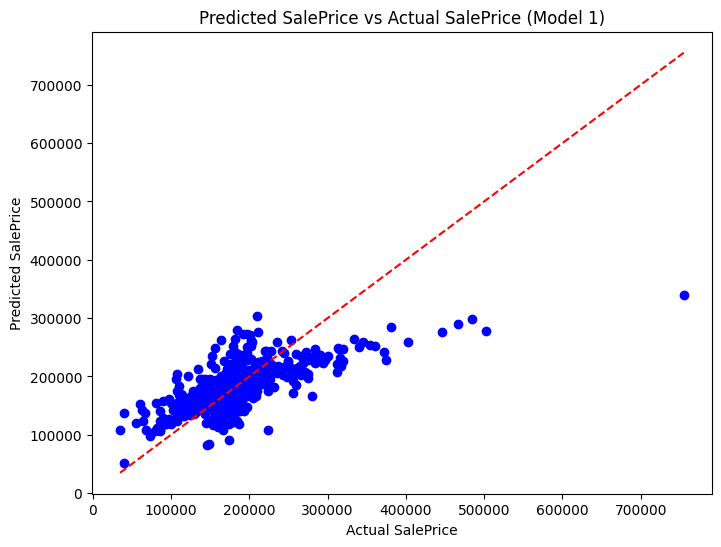

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Load the data (Assuming 'df' is the dataframe with your dataset)
# For example: df = pd.read_csv('your_data.csv')

# Step 2: Define the target variable (SalePrice) and predictors
Y = df['SalePrice']  # Dependent variable (target)

# List of top 10 predictors from correlation analysis (Replace with your actual top 10 predictors)
top_10_predictors = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'TotalBsmtSF', 'FullBath', 'MasVnrArea', 'GarageCars', 'GarageArea',
]

# Independent variables (top 10 predictors)
X_top_10 = df[top_10_predictors]

# Step 3: Convert all predictor columns to numeric (this ensures no non-numeric data)
X_top_10 = X_top_10.apply(pd.to_numeric, errors='coerce')

# Step 4: Add constant (intercept) to the predictors
X_top_10 = sm.add_constant(X_top_10)

# Step 5: Convert the target variable 'Y' to numeric (in case it has non-numeric data)
Y = pd.to_numeric(Y, errors='coerce')

# Step 6: Drop rows with NaN values in the target or predictors
df_clean = pd.concat([X_top_10, Y], axis=1).dropna()
X_top_10_clean = df_clean.drop(columns=['SalePrice'])
Y_clean = df_clean['SalePrice']

# Step 7: Fit the regression model with the top 10 predictors
model_top_10 = sm.OLS(Y_clean, X_top_10_clean).fit()

# Print the summary of the regression model (Model 1)
print("Model 1 (Top 10 Predictors):")
print(model_top_10.summary())

# Step 8: Drop statistically insignificant predictors (p-value > 0.05)
significant_predictors = model_top_10.pvalues[model_top_10.pvalues <= 0.05].index
if 'const' not in significant_predictors:
    significant_predictors = ['const'] + [col for col in significant_predictors]

X_significant = X_top_10_clean[significant_predictors]

# Step 9: Fit the regression model again with significant predictors
model_significant = sm.OLS(Y_clean, X_significant).fit()

# Print summary of Model 1 with significant predictors
print("\nModel 1 with Significant Predictors:")
print(model_significant.summary())

# Step 10: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_significant, Y_clean, test_size=0.2, random_state=42)

# Step 11: Fit the model on the training data for Model 1
model_train = sm.OLS(Y_train, X_train).fit()

# Predict SalePrice on the test data
Y_pred = model_train.predict(X_test)

# Step 12: Scatter plot of Predicted SalePrice vs Actual SalePrice (Model 1)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Predicted SalePrice vs Actual SalePrice (Model 1)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()



In [ ]:
print(list(df.columns))

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood


Model 2 (All Predictors):
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     9.361
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          6.49e-287
Time:                        01:19:37   Log-Likelihood:                -34835.
No. Observations:                2919   AIC:                         7.044e+04
Df Residuals:                    2533   BIC:                         7.275e+04
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
con

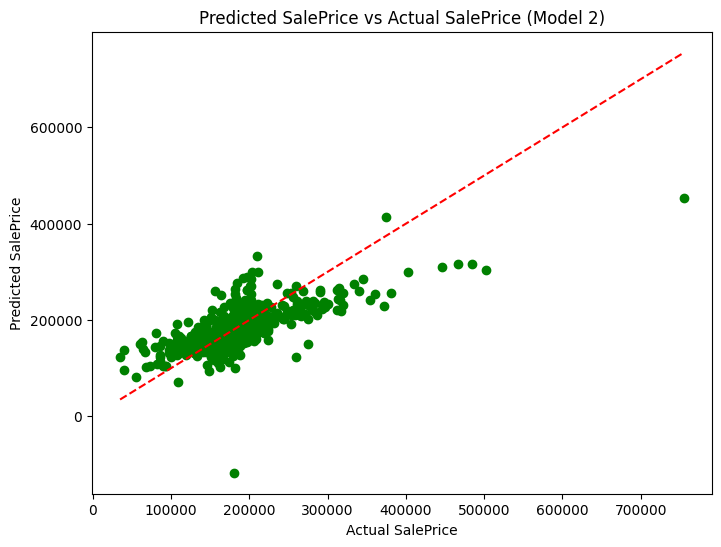


Model 2 Performance Metrics:
Mean Absolute Error (MAE): 30176.817244357913
Mean Squared Error (MSE): 1849330657.8941367
R-squared: 0.5039889758073678

Model 1 Performance Metrics:
Mean Absolute Error (MAE): 31236.20124698753
Mean Squared Error (MSE): 1999938792.189548
R-squared: 0.46359420128463613


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 13: Prepare predictors and target for Model 2 (using all predictors in the dataset)
X_all_predictors = df.drop(columns=['SalePrice'])
Y = df['SalePrice']

# Step 14: Convert boolean columns to numeric
bool_columns = X_all_predictors.select_dtypes(include=['bool']).columns
X_all_predictors[bool_columns] = X_all_predictors[bool_columns].astype(int)

# Convert other non-numeric columns to numeric where possible
numeric_columns = X_all_predictors.select_dtypes(include=[np.number]).columns
X_all_predictors[numeric_columns] = X_all_predictors[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create dummy variables for remaining categorical columns
X_all_predictors = pd.get_dummies(X_all_predictors, dummy_na=True, drop_first=True)

# Step 15: Clean the data
X_all_predictors_clean = X_all_predictors.dropna()
Y_clean = pd.to_numeric(Y, errors='coerce').dropna()

# Ensure X and Y have matching indices
common_index = X_all_predictors_clean.index.intersection(Y_clean.index)
X_all_predictors_clean = X_all_predictors_clean.loc[common_index]
Y_clean = Y_clean.loc[common_index]

# Step 16: Add constant (intercept) to the predictors
X_all_predictors_clean = sm.add_constant(X_all_predictors_clean)

# Step 17: Fit Model 2 with all predictors
model_all = sm.OLS(Y_clean, X_all_predictors_clean).fit()

print("\nModel 2 (All Predictors):")
print(model_all.summary())

# Step 18: Drop statistically insignificant predictors in Model 2
significant_predictors_all = model_all.pvalues[model_all.pvalues <= 0.05].index
X_significant_all = X_all_predictors_clean[significant_predictors_all]

# Step 19: Fit the regression model again with significant predictors for Model 2
model_significant_all = sm.OLS(Y_clean, X_significant_all).fit()

print("\nModel 2 with Significant Predictors:")
print(model_significant_all.summary())

# Step 20: Split the data into training and testing sets for Model 2
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_significant_all, Y_clean, test_size=0.2, random_state=42)

# Step 21: Fit the model on the training data for Model 2
model_train_all = sm.OLS(Y_train_all, X_train_all).fit()

# Predict SalePrice on the test data for Model 2
Y_pred_all = model_train_all.predict(X_test_all)

# Step 22: Scatter plot of Predicted SalePrice vs Actual SalePrice for Model 2
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_all, Y_pred_all, color='green')
plt.plot([Y_test_all.min(), Y_test_all.max()], [Y_test_all.min(), Y_test_all.max()], color='red', linestyle='--')
plt.title('Predicted SalePrice vs Actual SalePrice (Model 2)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

# Step 23: Compare prediction performance between Model 1 and Model 2

# Model 2 performance metrics
mae_model_2 = mean_absolute_error(Y_test_all, Y_pred_all)
mse_model_2 = mean_squared_error(Y_test_all, Y_pred_all)
r2_model_2 = r2_score(Y_test_all, Y_pred_all)

print("\nModel 2 Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_model_2}")
print(f"Mean Squared Error (MSE): {mse_model_2}")
print(f"R-squared: {r2_model_2}")

# Assuming you have Y_test and Y_pred from Model 1
mae_model_1 = mean_absolute_error(Y_test, Y_pred)
mse_model_1 = mean_squared_error(Y_test, Y_pred)
r2_model_1 = r2_score(Y_test, Y_pred)

print("\nModel 1 Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_model_1}")
print(f"Mean Squared Error (MSE): {mse_model_1}")
print(f"R-squared: {r2_model_1}")


#Part 4

Feature Importance Bar Plot (Using Coefficients from the Model)

Length of feature_names: 38
Length of feature_importance: 37
Feature names: Index(['LotArea', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'MiscVal',
       'LotShape_Reg', 'LandSlope_Sev', 'Neighborhood_NoRidge',
       'Condition1_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior2nd_Other', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'PavedDrive_Y',
       'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MoSold_12.0',
       'YearBuilt_1893.0'],
      dtype='object')
Feature importance: OverallCond               2003.910492
BsmtFinSF1                   6.217196
TotalBsmtSF                 17.944080
2ndFlrSF                     5.034498
G

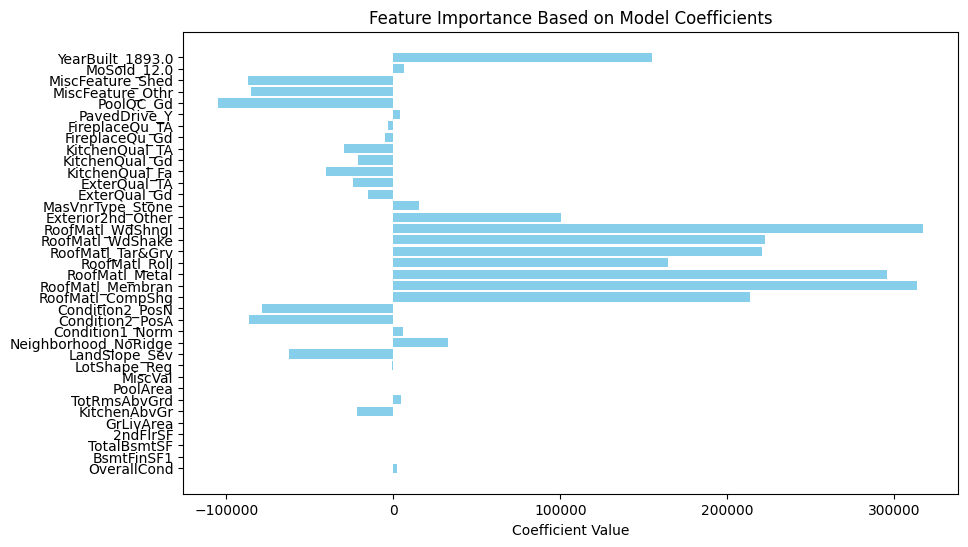

In [ ]:
# Remove the intercept term ('const') from the model coefficients
feature_names = X_significant_all.columns  # All feature names
feature_importance = model_significant_all.params[1:]  # Exclude the intercept term

# If there's any discrepancy, ensure that the features and coefficients match in length
if len(feature_names) != len(feature_importance):
    print(f"Length of feature_names: {len(feature_names)}")
    print(f"Length of feature_importance: {len(feature_importance)}")
    print(f"Feature names: {feature_names}")
    print(f"Feature importance: {feature_importance}")

# Create a horizontal bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[1:], feature_importance, color='skyblue')  # Exclude 'const' from the feature names
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Model Coefficients')
plt.show()

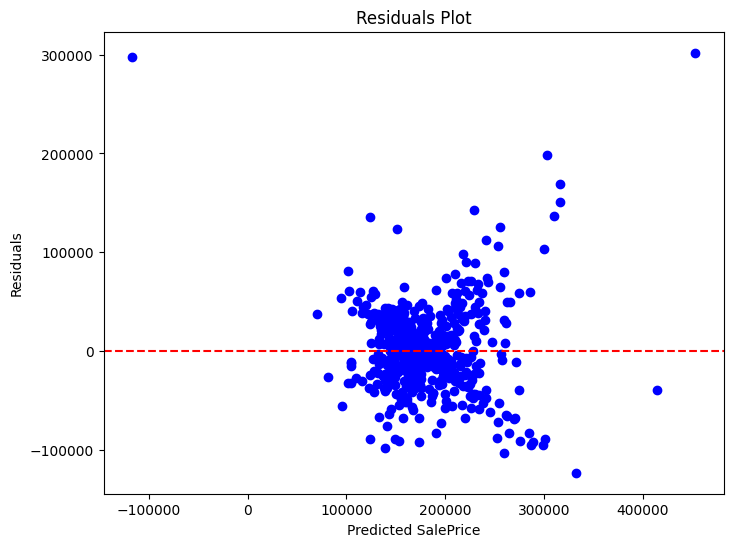

In [ ]:
# Calculate the residuals
residuals = Y_test_all - Y_pred_all

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_all, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at zero
plt.title('Residuals Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

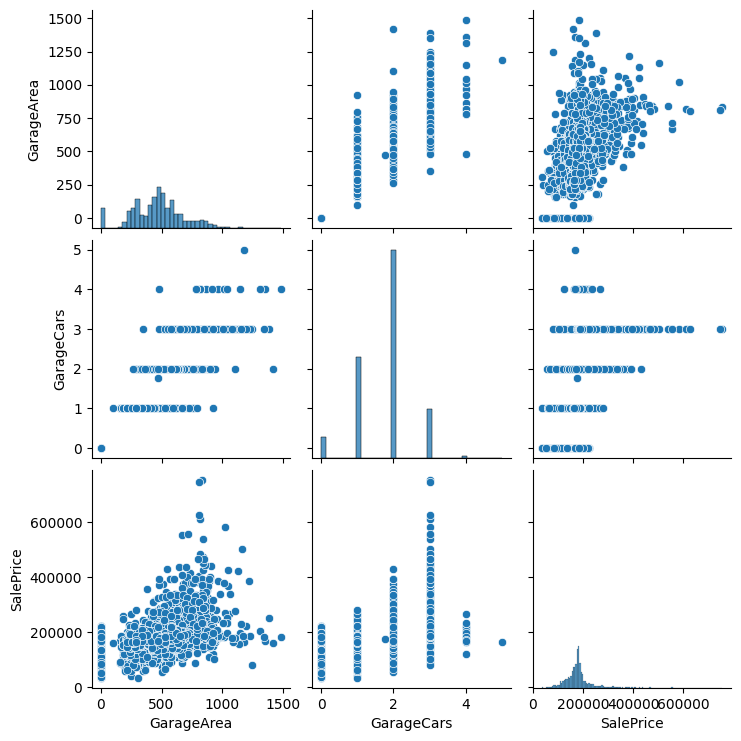

In [ ]:
sns.pairplot(data=df, vars=["GarageArea", "GarageCars", "SalePrice"])
plt.show()